In [1]:
# Importing basic packages
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

## Importing the data

In [2]:
ecom_data = pd.read_csv('data.csv',encoding = 'cp1252')
ecom_data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


## Data Study

In [3]:
# Getting general information about the data
ecom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
ecom_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


In [5]:
# Getting the basic description of data
ecom_data.describe(include = 'O')

,InvoiceNo,StockCode,Description,InvoiceDate,Country
count,541909,541909,540455,541909,541909
unique,25900,4070,4223,23260,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,10/31/2011 14:41,United Kingdom
freq,1114,2313,2369,1114,495478


In [6]:
#Creating a copy of the original data to another variable.
data = ecom_data.copy()
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [7]:
# Displaying the shape of the DataFrame
data.shape

(541909, 8)

In [8]:
# Displaying the column names of the DF 
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [9]:
# Checking the number of unique values in each field
for column in data.columns:
    print(f'The number of unique values in {column} is: {data[column].nunique()}')

The number of unique values in InvoiceNo is: 25900
The number of unique values in StockCode is: 4070
The number of unique values in Description is: 4223
The number of unique values in Quantity is: 722
The number of unique values in InvoiceDate is: 23260
The number of unique values in UnitPrice is: 1630
The number of unique values in CustomerID is: 4372
The number of unique values in Country is: 38


In [10]:
# Checking for the unique values in each field
for column in data.columns:
    print(f'The unique values in {column} is: {data[column].unique()}')
    print('*'*100)

The unique values in InvoiceNo is: ['536365' '536366' '536367' ... '581585' '581586' '581587']
****************************************************************************************************
The unique values in StockCode is: ['85123A' '71053' '84406B' ... '90214U' '47591b' '23843']
****************************************************************************************************
The unique values in Description is: ['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN'
 'CREAM CUPID HEARTS COAT HANGER' ... 'lost'
 'CREAM HANGING HEART T-LIGHT HOLDER' 'PAPER CRAFT , LITTLE BIRDIE']
****************************************************************************************************
The unique values in Quantity is: [     6      8      2     32      3      4     24     12     48     18
     20     36     80     64     10    120     96     23      5      1
     -1     50     40    100    192    432    144    288    -12    -24
     16      9    128     25     30     28      7  

In [11]:
# Checking for the value counts of each values in each field
for column in data.columns:
    print(f'The value counts of {column} is: {data[column].value_counts()}')
    print('*'*100)

The value counts of InvoiceNo is: 573585     1114
581219      749
581492      731
580729      721
558475      705
           ... 
554023        1
554022        1
554021        1
554020        1
C558901       1
Name: InvoiceNo, Length: 25900, dtype: int64
****************************************************************************************************
The value counts of StockCode is: 85123A    2313
22423     2203
85099B    2159
47566     1727
20725     1639
          ... 
21431        1
22275        1
17001        1
90187A       1
72759        1
Name: StockCode, Length: 4070, dtype: int64
****************************************************************************************************
The value counts of Description is: WHITE HANGING HEART T-LIGHT HOLDER     2369
REGENCY CAKESTAND 3 TIER               2200
JUMBO BAG RED RETROSPOT                2159
PARTY BUNTING                          1727
LUNCH BAG RED RETROSPOT                1638
                                       ... 


## Data Preparation

In [12]:
# Checking for the duplicate values in the DF
print(data.duplicated().sum())
data[data.duplicated()==True]

5268


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,12/1/2010 11:49,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,12/9/2011 11:34,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,12/9/2011 11:34,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,12/9/2011 11:34,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,12/9/2011 11:34,2.10,14446.0,United Kingdom


In [13]:
#Shape of DF before dropping duplicates
data.shape

(541909, 8)

In [14]:
# Dropping the duplicates
data = data.drop_duplicates()
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [15]:
#Shape of DF after dropping duplicates
data.shape

(536641, 8)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536641 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    536641 non-null  object 
 1   StockCode    536641 non-null  object 
 2   Description  535187 non-null  object 
 3   Quantity     536641 non-null  int64  
 4   InvoiceDate  536641 non-null  object 
 5   UnitPrice    536641 non-null  float64
 6   CustomerID   401604 non-null  float64
 7   Country      536641 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 36.8+ MB


In [17]:
# Converting InvoiceDate to datetime datatype
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536641 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    536641 non-null  object        
 1   StockCode    536641 non-null  object        
 2   Description  535187 non-null  object        
 3   Quantity     536641 non-null  int64         
 4   InvoiceDate  536641 non-null  datetime64[ns]
 5   UnitPrice    536641 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      536641 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.8+ MB


In [18]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,536641.0,9.620029,219.130156,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,536641.0,4.632656,97.233118,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,401604.0,15281.160818,1714.006089,12346.00,13939.00,15145.00,16784.00,18287.0


In [19]:
data.describe(include = 'O').T

,count,unique,top,freq
InvoiceNo,536641,25900,573585,1114
StockCode,536641,4070,85123A,2301
Description,535187,4223,WHITE HANGING HEART T-LIGHT HOLDER,2357
Country,536641,38,United Kingdom,490300


In [20]:
#Calculating the TotalPrice per order based on the UnitPrice and Quantity ordered
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']

In [21]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


## Visualisations

In [22]:
# Top 10 products purchased by customers
top10prod = data['Description'].value_counts()[:10]
top10prod = top10prod.sort_values()
top10prod

NATURAL SLATE HEART CHALKBOARD        1272
LUNCH BAG  BLACK SKULL.               1323
PACK OF 72 RETROSPOT CAKE CASES       1367
SET OF 3 CAKE TINS PANTRY DESIGN      1465
ASSORTED COLOUR BIRD ORNAMENT         1488
LUNCH BAG RED RETROSPOT               1625
PARTY BUNTING                         1720
JUMBO BAG RED RETROSPOT               2156
REGENCY CAKESTAND 3 TIER              2189
WHITE HANGING HEART T-LIGHT HOLDER    2357
Name: Description, dtype: int64

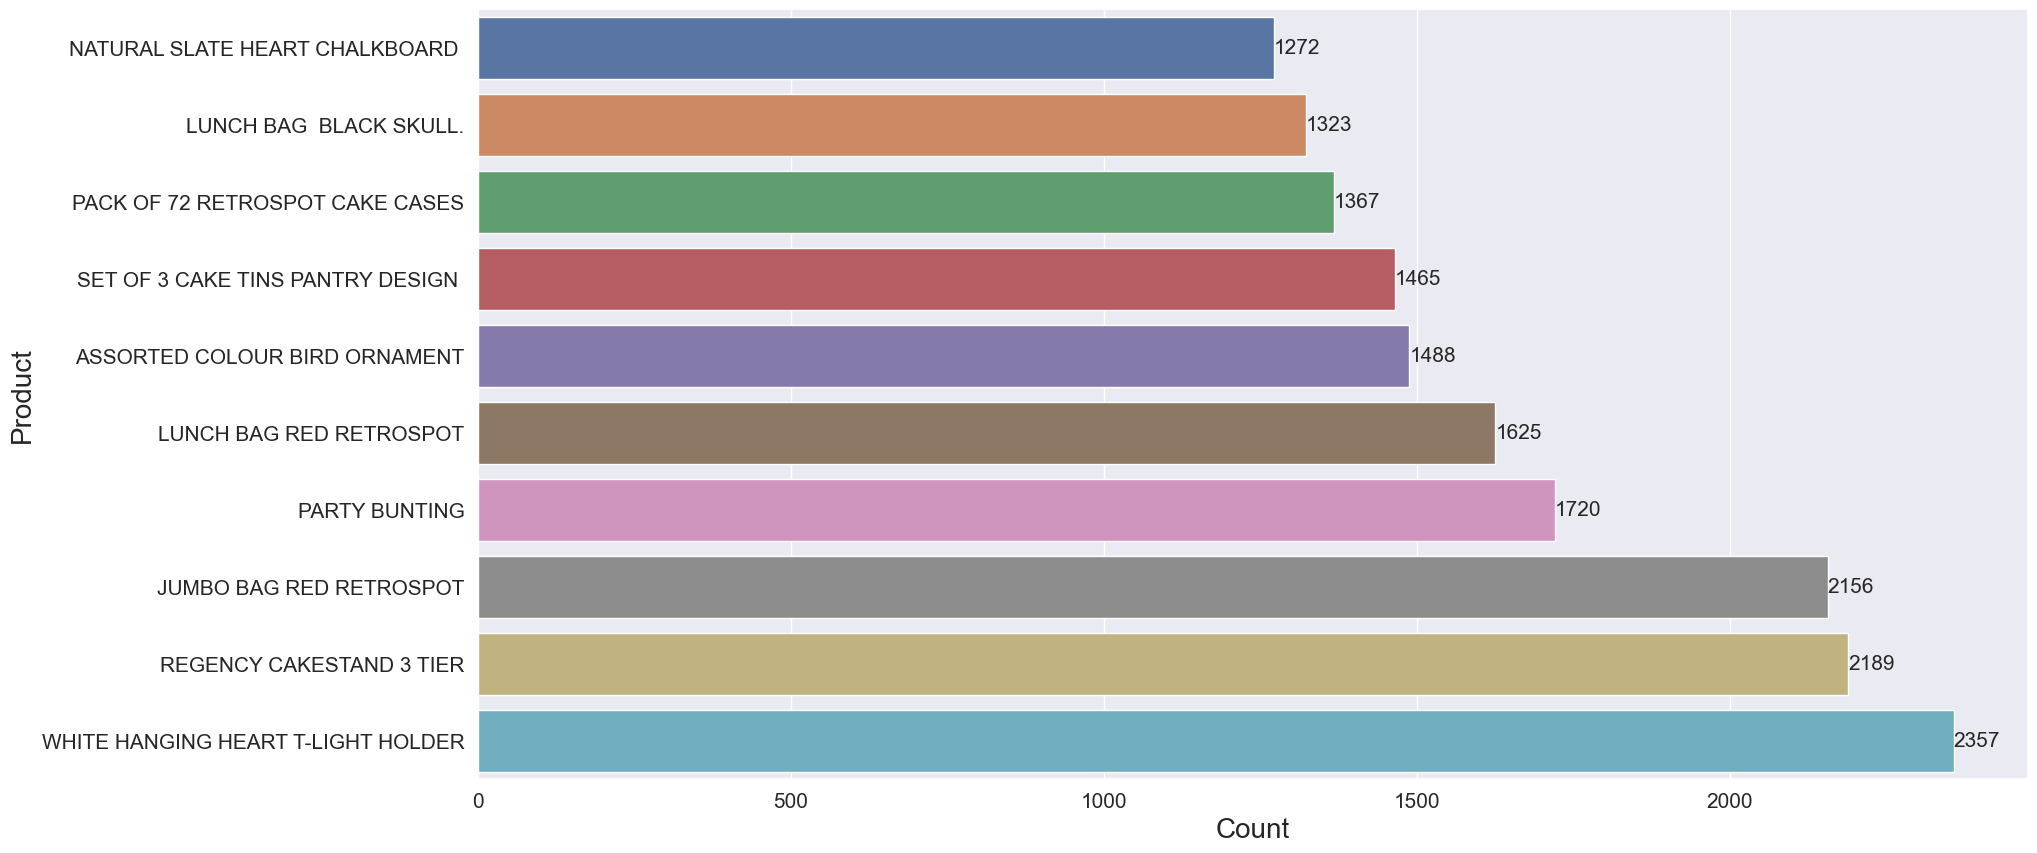

In [23]:
plt.figure(figsize = (20,10))
ax = sns.barplot(data = top10prod, x = top10prod.index, y = top10prod.values,orient = "h")
ax.bar_label(ax.containers[0], fontsize=15)
plt.ylabel('Product', fontsize=20)
plt.xlabel('Count', fontsize=20)
plt.yticks(ticks = range(10), labels = top10prod.index, fontsize=15)
plt.xticks(fontsize=15)
plt.show()

In [24]:
# Top 10 countries with high customer base
top10country = data['Country'].value_counts()[:10]
top10country = top10country.sort_values()
top10country

Australia           1258
Portugal            1510
Switzerland         1994
Belgium             2069
Netherlands         2371
Spain               2528
EIRE                8184
France              8541
Germany             9480
United Kingdom    490300
Name: Country, dtype: int64

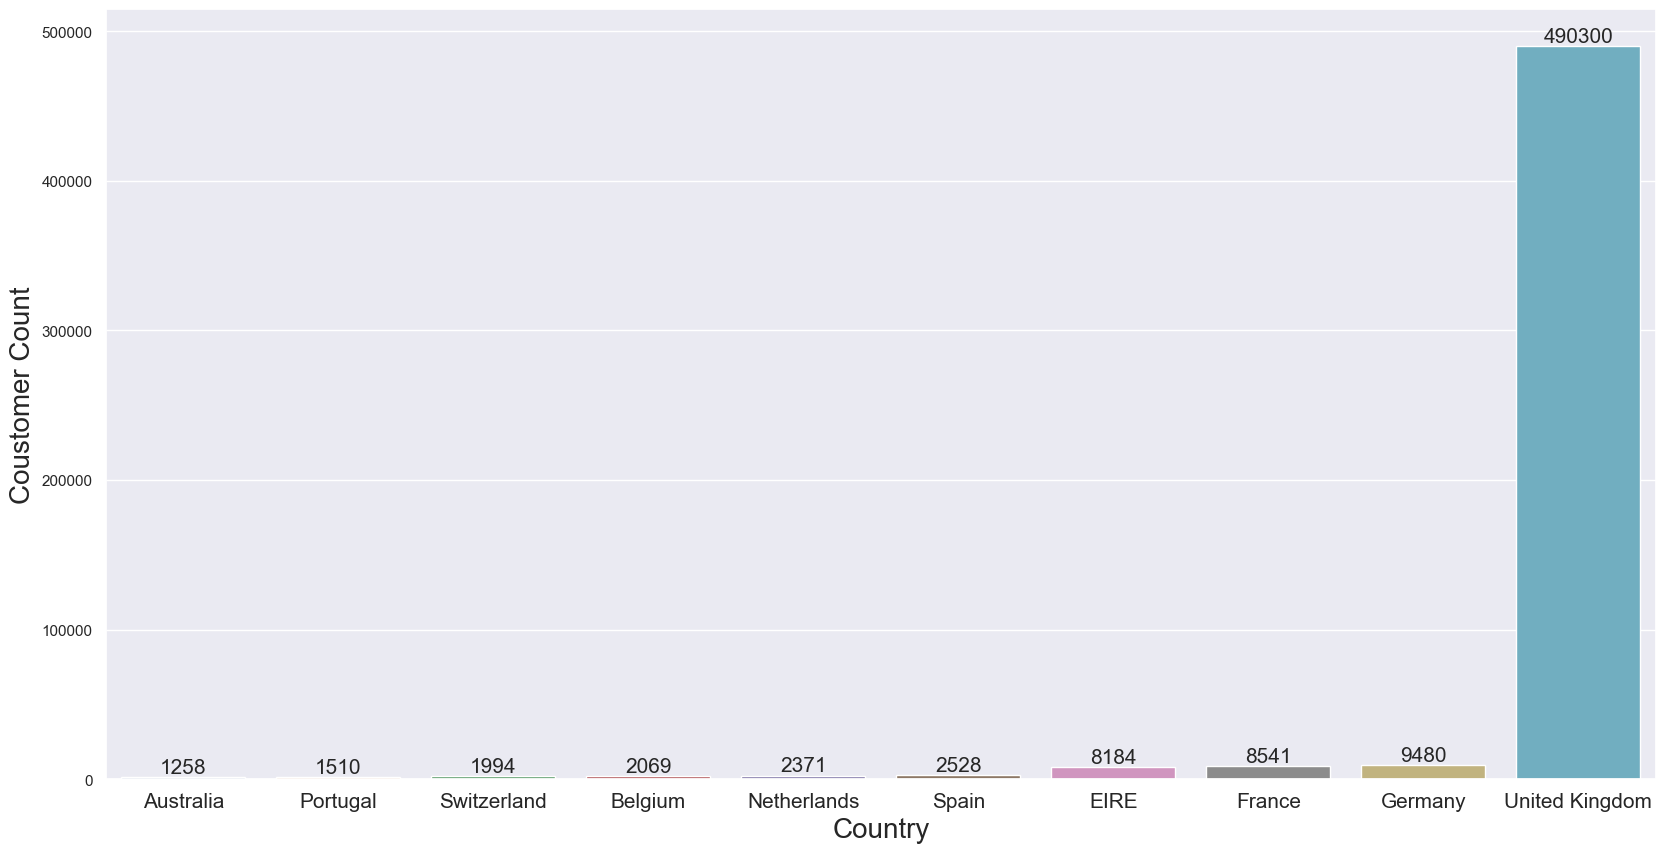

In [25]:
plt.figure(figsize = (20,10))
ax = sns.barplot(data = top10country, x = top10country.index, y = top10country.values, orient = "v")
ax.bar_label(ax.containers[0], fontsize=15)
plt.ylabel('Coustomer Count', fontsize=20)
plt.xlabel('Country', fontsize=20)
plt.xticks(ticks = range(10), labels = top10country.index, fontsize=15)
plt.xticks(fontsize=15)
plt.show()

In [26]:
# No of units each product were purchased
data.groupby('Description').agg({'Quantity':'sum'}).sort_values('Quantity', ascending = False)

,Quantity
Description,
WORLD WAR 2 GLIDERS ASSTD DESIGNS,53751
JUMBO BAG RED RETROSPOT,47260
POPCORN HOLDER,36322
ASSORTED COLOUR BIRD ORNAMENT,36282
PACK OF 72 RETROSPOT CAKE CASES,36016
...,...
Damaged,-7540
Printing smudges/thrown away,-9058
check,-12030


## Data Preparation (continuation)

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536641 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    536641 non-null  object        
 1   StockCode    536641 non-null  object        
 2   Description  535187 non-null  object        
 3   Quantity     536641 non-null  int64         
 4   InvoiceDate  536641 non-null  datetime64[ns]
 5   UnitPrice    536641 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      536641 non-null  object        
 8   TotalPrice   536641 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 40.9+ MB


In [28]:
# Columns that are needed for the RFM approach are 'CustomerID', 'InvoiceNo', 'InvoiceDate', 'TotalPrice'
# 'InvoiceDate' - needed for knowing Recency
# 'InvoiceNo', 'CustomerID' - needed for knowing Frequency
# 'TotalPrice' - needed for knowing Monetary

In [29]:
data = data[['CustomerID', 'InvoiceNo', 'InvoiceDate', 'TotalPrice']]
data.head()

,CustomerID,InvoiceNo,InvoiceDate,TotalPrice
0,17850.0,536365,2010-12-01 08:26:00,15.30
1,17850.0,536365,2010-12-01 08:26:00,20.34
2,17850.0,536365,2010-12-01 08:26:00,22.00
3,17850.0,536365,2010-12-01 08:26:00,20.34
4,17850.0,536365,2010-12-01 08:26:00,20.34


In [30]:
data.shape

(536641, 4)

In [31]:
# Checking for null values
data.isnull().sum()

CustomerID     135037
InvoiceNo           0
InvoiceDate         0
TotalPrice          0
dtype: int64

In [32]:
#Removing null values from the DF
data.dropna(inplace = True)

In [33]:
data.shape

(401604, 4)

In [34]:
data.isnull().sum()

CustomerID     0
InvoiceNo      0
InvoiceDate    0
TotalPrice     0
dtype: int64

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   CustomerID   401604 non-null  float64       
 1   InvoiceNo    401604 non-null  object        
 2   InvoiceDate  401604 non-null  datetime64[ns]
 3   TotalPrice   401604 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 15.3+ MB


In [36]:
#Renaming the columns
data = data.rename(columns={'InvoiceDate':'Date', 'TotalPrice':'Price'})

In [37]:
data.head()

,CustomerID,InvoiceNo,Date,Price
0,17850.0,536365,2010-12-01 08:26:00,15.30
1,17850.0,536365,2010-12-01 08:26:00,20.34
2,17850.0,536365,2010-12-01 08:26:00,22.00
3,17850.0,536365,2010-12-01 08:26:00,20.34
4,17850.0,536365,2010-12-01 08:26:00,20.34


In [38]:
data['CustomerID'].nunique()

4372

In [39]:
data['Date'].describe()

count                  401604
unique                  20460
top       2011-11-14 15:27:00
freq                      543
first     2010-12-01 08:26:00
last      2011-12-09 12:50:00
Name: Date, dtype: object

In [40]:
#The data DF contains transactions from '2010-12-01 08:26:00' to '2011-12-09 12:50:00'

In [41]:
import datetime as dt

In [42]:
# Taking the latest date as 1 day after the last transaction.
Recent_date = dt.datetime(2011,12,10)
Recent_date

datetime.datetime(2011, 12, 10, 0, 0)

In [43]:
#Grouping the customers based on CustomerID and aggregations done on the rest of the columns to know the 
# Recency, Frequency and Monetary values
RFMScore = data.groupby('CustomerID').agg({'Date': lambda x: (Recent_date - x.max()).days,
                                            'InvoiceNo': lambda x: x.count(),
                                          'Price': lambda x: x.sum()})

In [44]:
RFMScore.head()

,Date,InvoiceNo,Price
CustomerID,,,
12346.0,325,2,0.00
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,18,73,1757.55
12350.0,310,17,334.40


In [45]:
#Renaming the columns for better understanding
RFMScore.rename(columns = {'Date':'Recency','InvoiceNo':'Frequency','Price':'Monetary'},inplace = True)

In [46]:
RFMScore.reset_index()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,2,0.00
1,12347.0,2,182,4310.00
2,12348.0,75,31,1797.24
3,12349.0,18,73,1757.55
4,12350.0,310,17,334.40
...,...,...,...,...
4367,18280.0,277,10,180.60
4368,18281.0,180,7,80.82
4369,18282.0,7,13,176.60
4370,18283.0,3,721,2045.53


In [47]:
RFMScore.Recency.describe()

count    4372.000000
mean       91.581199
std       100.772139
min         0.000000
25%        16.000000
50%        50.000000
75%       143.000000
max       373.000000
Name: Recency, dtype: float64

In [48]:
RFMScore.Frequency.describe()

count    4372.000000
mean       91.858188
std       229.223566
min         1.000000
25%        17.000000
50%        41.000000
75%        99.250000
max      7812.000000
Name: Frequency, dtype: float64

In [49]:
RFMScore.Monetary.describe()

count      4372.000000
mean       1893.531433
std        8218.696204
min       -4287.630000
25%         291.795000
50%         644.070000
75%        1608.335000
max      279489.020000
Name: Monetary, dtype: float64

In [50]:
RFMScore

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,2,0.00
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,18,73,1757.55
12350.0,310,17,334.40
...,...,...,...
18280.0,277,10,180.60
18281.0,180,7,80.82
18282.0,7,13,176.60


In [51]:
# split the data information: quantile method
quantiles = RFMScore.quantile(q=[0.25,0.50,0.75])

In [52]:
quantiles

,Recency,Frequency,Monetary
0.25,16.0,17.00,291.795
0.50,50.0,41.00,644.070
0.75,143.0,99.25,1608.335


In [53]:
#converting the quantiles to dictionary format
quantiles = quantiles.to_dict()
quantiles

{'Recency': {0.25: 16.0, 0.5: 50.0, 0.75: 143.0},
 'Frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 99.25},
 'Monetary': {0.25: 291.795, 0.5: 644.0699999999999, 0.75: 1608.335}}

In [54]:
#Creating a function to group the customers into 4 based on Recency value
def RecencyScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.5]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4

In [55]:
#Creating a function to group the customers into 4 based on Frequency and Monetary values
def FreqMonetScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.5]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

In [56]:
RFMScore.columns

Index(['Recency', 'Frequency', 'Monetary'], dtype='object')

In [57]:
# Applying the created function on the respective columns
RFMScore['R'] = RFMScore['Recency'].apply(RecencyScore, args = ('Recency',quantiles))
RFMScore['F'] = RFMScore['Frequency'].apply(FreqMonetScore, args = ('Frequency',quantiles))
RFMScore['M'] = RFMScore['Monetary'].apply(FreqMonetScore, args = ('Monetary',quantiles))

In [58]:
RFMScore

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
12346.0,325,2,0.00,4,4,4
12347.0,2,182,4310.00,1,1,1
12348.0,75,31,1797.24,3,3,1
12349.0,18,73,1757.55,2,2,1
12350.0,310,17,334.40,4,4,3
...,...,...,...,...,...,...
18280.0,277,10,180.60,4,4,4
18281.0,180,7,80.82,4,4,4
18282.0,7,13,176.60,1,4,4


In [59]:
#Creating a new field 'RFMValue' to split the customers into 10 segments
RFMScore['RFMValue'] = RFMScore[['R','F','M']].sum(axis = 1)

In [60]:
RFMScore

,Recency,Frequency,Monetary,R,F,M,RFMValue
CustomerID,,,,,,,
12346.0,325,2,0.00,4,4,4,12
12347.0,2,182,4310.00,1,1,1,3
12348.0,75,31,1797.24,3,3,1,7
12349.0,18,73,1757.55,2,2,1,5
12350.0,310,17,334.40,4,4,3,11
...,...,...,...,...,...,...,...
18280.0,277,10,180.60,4,4,4,12
18281.0,180,7,80.82,4,4,4,12
18282.0,7,13,176.60,1,4,4,9


In [61]:
RFMScore['RFMGroup'] = RFMScore.R.map(str) + RFMScore.F.map(str) + RFMScore.M.map(str)

In [62]:
RFMScore.reset_index()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMValue,RFMGroup
0,12346.0,325,2,0.00,4,4,4,12,444
1,12347.0,2,182,4310.00,1,1,1,3,111
2,12348.0,75,31,1797.24,3,3,1,7,331
3,12349.0,18,73,1757.55,2,2,1,5,221
4,12350.0,310,17,334.40,4,4,3,11,443
...,...,...,...,...,...,...,...,...,...
4367,18280.0,277,10,180.60,4,4,4,12,444
4368,18281.0,180,7,80.82,4,4,4,12,444
4369,18282.0,7,13,176.60,1,4,4,9,144
4370,18283.0,3,721,2045.53,1,1,1,3,111


In [63]:
#Grouping the 10 segments of customers into 4 groups and naming them
Customer_Level = ['Platinum','Diamond','Gold','Silver']
score_cuts = pd.qcut(RFMScore.RFMValue, q=4, labels=Customer_Level)
RFMScore['Customer_Level'] = score_cuts.values
RFMScore = RFMScore.reset_index()
RFMScore

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMValue,RFMGroup,Customer_Level
0,12346.0,325,2,0.00,4,4,4,12,444,Silver
1,12347.0,2,182,4310.00,1,1,1,3,111,Platinum
2,12348.0,75,31,1797.24,3,3,1,7,331,Diamond
3,12349.0,18,73,1757.55,2,2,1,5,221,Platinum
4,12350.0,310,17,334.40,4,4,3,11,443,Silver
...,...,...,...,...,...,...,...,...,...,...
4367,18280.0,277,10,180.60,4,4,4,12,444,Silver
4368,18281.0,180,7,80.82,4,4,4,12,444,Silver
4369,18282.0,7,13,176.60,1,4,4,9,144,Gold
4370,18283.0,3,721,2045.53,1,1,1,3,111,Platinum


In [64]:
# Displaying the number of customers in each group
cust_group = RFMScore['Customer_Level'].value_counts().sort_values()
cust_group

Silver       781
Gold         985
Platinum    1281
Diamond     1325
Name: Customer_Level, dtype: int64

In [65]:
# RFMValue = 3 or 4 or 5 - Platinum
# RFMValue = 6 or 7 or 8 - Diamond
# RFMValue = 9 or 10 - Gold
# RFMValue = 11 or 12 - Silver

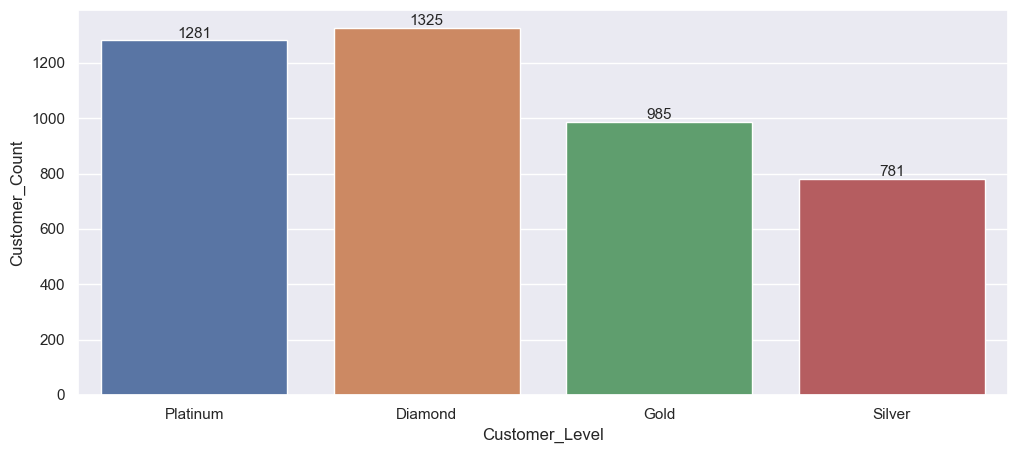

In [66]:
#Displaying the customer groups and their counts in a barchart
plt.figure(figsize = (12,5))
ax = sns.barplot(RFMScore, x = cust_group.index, y = cust_group.values)
ax.bar_label(ax.containers[0], fontsize=11)
plt.xlabel('Customer_Level', fontsize=12)
plt.ylabel('Customer_Count', fontsize=12)
plt.show()